# Домашняя работа №1

In [1]:
%matplotlib inline
from Bio import SeqIO
import gzip
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Константы:

In [2]:
MIN_BOUND_SCORE = 20 # nucl with score less than 20 we label as bad
MAX_PERCENT_NUCL_WITH_BAD_SCORE = 50.0 # we will assume that read that consist more than 50% bad nucls as bad 

Вспомогательные функции

In [3]:
"""
:returns True if many bad nucleotides, False -- otherwise
"""
def is_bad_read(quality_scores):
    cnt_bad_nucl = sum(1 for score in quality_scores if is_bad_score(score))
    percent_bad_scores = float(cnt_bad_nucl) / float(len(quality_scores))
    return percent_bad_scores >= MAX_PERCENT_NUCL_WITH_BAD_SCORE

In [4]:
"""
:returns True if nucl is bad quality, False -- otherwise
"""
def is_bad_score(score):
    return score < MIN_BOUND_SCORE

In [5]:
"""
:returns percent of norm gc content
"""
def get_gc_percent(seq, quality_scores):
    # score in [0, 42]
    cnt_gc_nucls = sum(1 for (i, nucl) in enumerate(seq)
                       if (nucl == 'G' or nucl == 'C') and (not is_bad_score(quality_scores[i])))
    return float(cnt_gc_nucls) / float(len(seq))

In [6]:
def get_stat(handle, len_read, MAX_Q=126, type_quality = "phred_quality", num_reads=None):
    percent_gc_to_number_reads = 101 * [0]
    pos_to_sum_prob_error = len_read * [0]
    logQs = [10 ** (float(-Q) / 10) for Q in range(MAX_Q + 1)] # Precompute probs
    total_norm_reads = 0
    for record in SeqIO.parse(handle, "fastq"):
        seq, quality_scores = record.seq, record.letter_annotations[type_quality]
        if is_bad_read(quality_scores): # don't consider bad reads
            continue

        total_norm_reads += 1
        if total_norm_reads % 100000 == 0 and num_reads is not None: # log
            print(f'{total_norm_reads} / {num_reads}')
        gc_percent = get_gc_percent(seq, quality_scores)
        percent_gc_to_number_reads[int(round(gc_percent * 100))] += 1

        for (i, score) in enumerate(quality_scores):
            pos_to_sum_prob_error[i] += logQs[score] # accumulate probs by each position
    
    pos_to_prob_error = list(map(lambda x: x / float(total_norm_reads), pos_to_sum_prob_error)) # calc mean as sum/num
    return (percent_gc_to_number_reads, pos_to_prob_error)

In [7]:
filename1 = '/home/ivankozlov98/Learning/NGS/Homeworks/Hw1/data/100x.1.fastq'
with open(filename1) as handle:
    percent_gc_to_number_reads1, pos_to_prob_error1 = get_stat(handle, 100, num_reads=2500000)

100000 / 2500000
200000 / 2500000
300000 / 2500000
400000 / 2500000
500000 / 2500000
600000 / 2500000
700000 / 2500000
800000 / 2500000
900000 / 2500000
1000000 / 2500000
1100000 / 2500000
1200000 / 2500000
1300000 / 2500000
1400000 / 2500000
1500000 / 2500000
1600000 / 2500000
1700000 / 2500000
1800000 / 2500000
1900000 / 2500000
2000000 / 2500000
2100000 / 2500000
2200000 / 2500000
2300000 / 2500000
2400000 / 2500000
2500000 / 2500000


In [8]:
filename2 = '/home/ivankozlov98/Learning/NGS/Homeworks/Hw1/data/100x.2.fastq'
with open(filename2) as handle:
    percent_gc_to_number_reads2, pos_to_prob_error2 = get_stat(handle, 100, num_reads=2500000)

100000 / 2500000
200000 / 2500000
300000 / 2500000
400000 / 2500000
500000 / 2500000
600000 / 2500000
700000 / 2500000
800000 / 2500000
900000 / 2500000
1000000 / 2500000
1100000 / 2500000
1200000 / 2500000
1300000 / 2500000
1400000 / 2500000
1500000 / 2500000
1600000 / 2500000
1700000 / 2500000
1800000 / 2500000
1900000 / 2500000
2000000 / 2500000
2100000 / 2500000
2200000 / 2500000
2300000 / 2500000
2400000 / 2500000
2500000 / 2500000


### Строим графики

#### 100x.1

##### Sequence quality

График, построенный `fastqc`


```Per base sequence quality```

![jupyter](./per_base_sq_1.png)

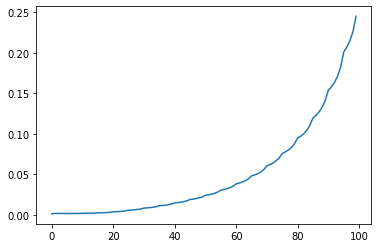

In [9]:
x = np.arange(len(pos_to_prob_error1))
y = pos_to_prob_error1
plt.plot(x, y)
plt.show()

Видно: что на графике `Per base sequence quality`, что на полученном одинаково проиллюстрировано падение качества секвенирования на концах ридов

##### GC content

![jupyter](./gc_1.png)

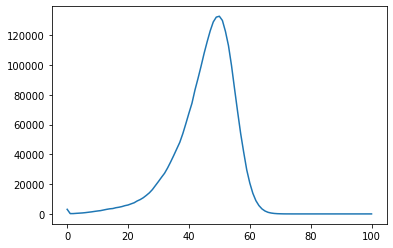

In [10]:
num_points = len(percent_gc_to_number_reads1)
x = np.arange(num_points)
y = percent_gc_to_number_reads1
plt.plot(x, y)
plt.show()

#### 100x.2

Всё -- аналогично 100x.1

##### Sequence quality

![jupyter](./per_base_sq_2.png)

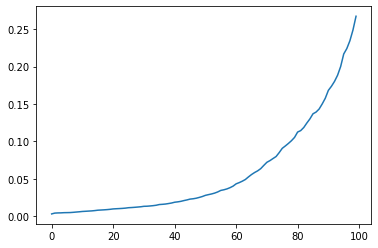

In [11]:
x = np.arange(len(pos_to_prob_error2))
y = pos_to_prob_error2
plt.plot(x, y)
plt.show()

##### GC content

![jupyter](./gc_1.png)

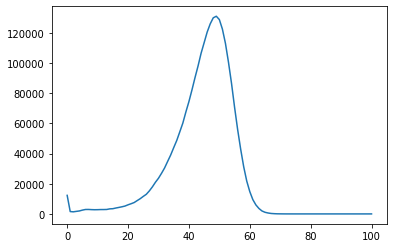

In [12]:
num_points = len(percent_gc_to_number_reads2)
x = np.arange(num_points)
y = percent_gc_to_number_reads2
plt.plot(x, y)
plt.show()